In [350]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [351]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [352]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [353]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2018-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2018-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2018-04-26 00:43:24,35.98,111953927754
8,South Karenland,2018-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2018-03-09 06:26:29,42.81,5327642267789


In [354]:
#merge the data sets
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [355]:
#create data frames by city type
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [356]:
urban_cities_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2018-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2018-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2018-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2018-03-26 07:22:45,7.63,8089282605778,3,Urban


In [357]:
# Get the number of rides for types.
total_ride_count_df = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_ride_count_df.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [358]:
#get total fares by type
total_fares_df = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_df.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [359]:
#total drivers by type
total_drivers_df = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_df.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [360]:
# Combine the data into a single dataset.
Pyber_data_complete_df = pd.merge(total_ride_count_df, total_drivers_df, on="type")
Pyber_data_complete_df.head()

,ride_id,driver_count
type,,
Rural,125,78
Suburban,625,490
Urban,1625,2405


In [361]:
Pyber_data_complete_df = pd.merge(Pyber_data_complete_df, total_fares_df, on="type")
Pyber_data_complete_df.head()

,ride_id,driver_count,fare
type,,,
Rural,125,78,4327.93
Suburban,625,490,19356.33
Urban,1625,2405,39854.38


In [362]:
Pyber_data_complete_df=Pyber_data_complete_df.rename(columns = {'type':'', 'ride_id':'Total Rides', 'driver_count':'Total Drivers', 'fare':'Total Fares'})

In [363]:
Pyber_data_complete_df

,Total Rides,Total Drivers,Total Fares
type,,,
Rural,125,78,4327.93
Suburban,625,490,19356.33
Urban,1625,2405,39854.38


In [364]:
Pyber_data_complete_df.dtypes

Total Rides        int64
Total Drivers      int64
Total Fares      float64
dtype: object

In [365]:
#Delete the index name.
del Pyber_data_complete_df.index.name 

In [366]:
Pyber_data_complete_df

,Total Rides,Total Drivers,Total Fares
Rural,125,78,4327.93
Suburban,625,490,19356.33
Urban,1625,2405,39854.38


In [367]:
#Calculate the average fare per ride and the average fare per driver by city type.
Pyber_data_complete_df['Average Fare per Ride'] = total_fares_df / total_ride_count_df
Pyber_data_complete_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride
Rural,125,78,4327.93,34.623440
Suburban,625,490,19356.33,30.970128
Urban,1625,2405,39854.38,24.525772


In [368]:
Pyber_data_complete_df['Average Fare per Driver'] = Pyber_data_complete_df['Total Fares'] / Pyber_data_complete_df['Total Drivers']
Pyber_data_complete_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [369]:
#Format summary dataframe & Finalized Summary DataFrame
Pyber_data_complete_df['Total Rides'] = Pyber_data_complete_df['Total Rides'].map("{:,}".format)
Pyber_data_complete_df['Total Drivers'] = Pyber_data_complete_df['Total Drivers'].map("{:,}".format)
Pyber_data_complete_df['Total Fares'] = Pyber_data_complete_df['Total Fares'].map("${:,.2f}".format)
Pyber_data_complete_df['Average Fare per Ride'] = Pyber_data_complete_df['Average Fare per Ride'].map("${:,.2f}".format)
Pyber_data_complete_df['Average Fare per Driver'] = Pyber_data_complete_df['Average Fare per Driver'].map("${:,.2f}".format)
Pyber_data_complete_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [370]:
#Part 2 of challenge
#rename columns
pyber_data_df=pyber_data_df.rename(columns ={'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})

In [371]:
pyber_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [372]:
#set the index to the Date column
pyber_data_df.set_index('Date')
pyber_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [373]:
#Create a new DataFrame using copy()
copy_pyber_data_df = pyber_data_df[['Date', 'City Type', 'Fare']].copy()

In [397]:
copy_pyber_data_df['Date'] =  pd.to_datetime(copy_pyber_data_df['Date'])

dtype('<M8[ns]')

In [398]:
copy_pyber_data_df.head()

,Date,City Type,Fare
0,2018-01-14 10:14:22,Urban,13.83
1,2018-03-04 18:24:09,Urban,30.24
2,2018-02-24 04:29:00,Urban,33.44
3,2018-02-10 23:22:03,Urban,23.44
4,2018-03-06 04:28:35,Urban,34.58


In [402]:
#Set the index to the datetime data type
copy_pyber_data_df = copy_pyber_data_df.set_index('Date') 

In [405]:
copy_pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2018-01-14 10:14:22 to 2018-04-25 10:20:13
Data columns (total 2 columns):
City Type    2375 non-null object
Fare         2375 non-null float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [406]:
#Calculate the sum() of fares by the type of city and date using groupby() to create a Series.
copy_total_fares_df = copy_pyber_data_df.groupby(["City Type"]).sum()["Fare"]
copy_total_fares_df.head()

City Type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: Fare, dtype: float64

In [407]:
#.map("${:,.2f}".format)

In [408]:
#Convert the groupby() Series into a DataFrame
copy_total_fares_df.to_frame()

,Fare
City Type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


In [409]:
pyber_pivot_table = pd.pivot_table(copy_pyber_data_df, values='Fare', index='Date', columns = 'City Type')

In [410]:
pyber_pivot_table

City Type,Rural,Suburban,Urban
Date,,,
2018-01-01 00:08:16,NaN,NaN,37.91
2018-01-01 00:46:46,NaN,47.74,NaN
2018-01-01 02:07:24,NaN,24.07,NaN
2018-01-01 03:46:50,NaN,NaN,7.57
2018-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2018-05-08 04:20:00,NaN,NaN,21.99
2018-05-08 04:39:49,NaN,NaN,18.45
2018-05-08 07:29:01,NaN,NaN,18.55


In [411]:
new_pyber_pivot_table = pyber_pivot_table.loc['2018-01-01':'2018-04-28']
new_pyber_pivot_table

City Type,Rural,Suburban,Urban
Date,,,
2018-01-01 00:08:16,NaN,NaN,37.91
2018-01-01 00:46:46,NaN,47.74,NaN
2018-01-01 02:07:24,NaN,24.07,NaN
2018-01-01 03:46:50,NaN,NaN,7.57
2018-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2018-04-28 14:28:36,NaN,NaN,11.46
2018-04-28 16:29:16,NaN,NaN,36.42
2018-04-28 17:26:52,NaN,NaN,31.43


In [412]:
weekly_pyber_df = new_pyber_pivot_table.resample('W').sum()

In [414]:
weekly_pyber_df.head()

City Type,Rural,Suburban,Urban
Date,,,
2018-01-07,187.92,876.61,1879.70
2018-01-14,139.80,1080.40,2193.36
2018-01-21,233.85,1163.93,2105.90
2018-01-28,210.94,1285.13,1846.98
2018-02-04,361.50,1079.58,2085.77


In [417]:
#Using the object-oriented interface method, plot the DataFrame you created in Step 12 using the df.plot() function.
# Import dependencies.
import matplotlib.pyplot as plt
import numpy as np

No handles with labels found to put in legend.


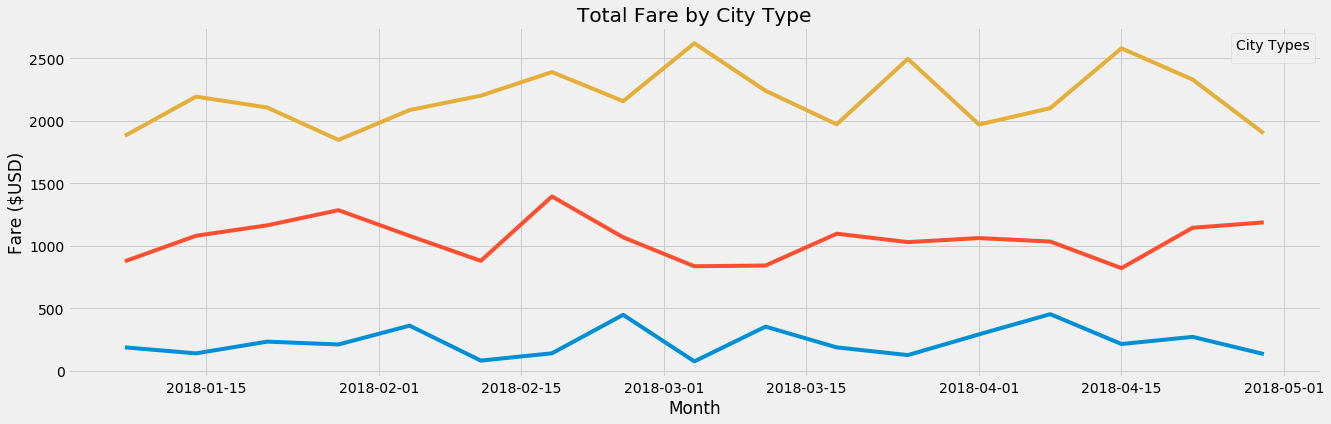

In [427]:
#create fivethirtyeight style graph

plt.style.use('fivethirtyeight')

x = np.linspace(0, 5)
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(weekly_pyber_df)
ax.set_xlabel('Month')
ax.set_ylabel('Fare ($USD)')
ax.set_title("Total Fare by City Type")
lgnd = plt.legend(fontsize="12", mode="Expanded", loc="best", title="City Types")
# Save Figure
plt.savefig("analysis/Fig8.png")
plt.show()